In [13]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
stopwords = set(STOPWORDS) 

In [14]:
train = pd.read_excel('data/Constraint_English_Train.xls')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [15]:
val = pd.read_excel('data/Constraint_English_Val.xls')
val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [16]:
test = pd.read_excel('data/english_test_with_labels.xls')
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [17]:
entire = pd.concat([train, val, test])
entire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10700 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 334.4+ KB


In [18]:
print(train['label'].value_counts())
print(val['label'].value_counts())
print(test['label'].value_counts())
print(entire['label'].value_counts())

real    3360
fake    3060
Name: label, dtype: int64
real    1120
fake    1020
Name: label, dtype: int64
real    1120
fake    1020
Name: label, dtype: int64
real    5600
fake    5100
Name: label, dtype: int64


In [19]:
combined = entire['tweet']
fake = entire[entire['label']=='fake']['tweet']
real = entire[entire['label']=='real']['tweet']

In [20]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [21]:
all_tokens = concat_all_sentences(combined)
fake_tokens = concat_all_sentences(fake)   
real_tokens = concat_all_sentences(real)

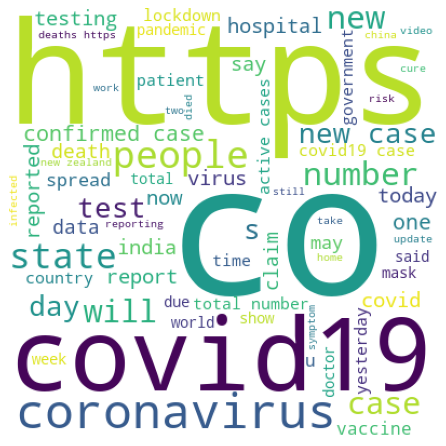

In [22]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'t'}), 
                      min_font_size=10).generate(concat_all_sentences(train['tweet']))

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


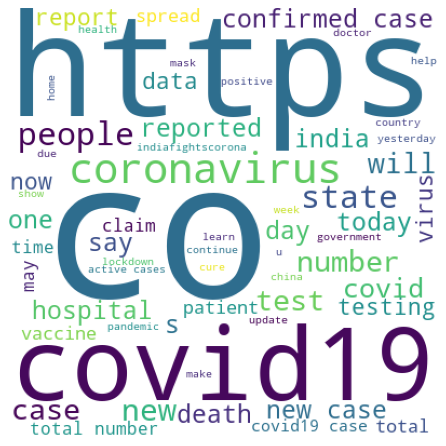

In [23]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'t'}), 
                      min_font_size=10).generate(concat_all_sentences(val['tweet']))

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


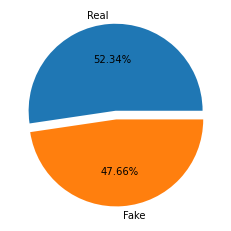

In [24]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([3360, 3060])

plt.figure(facecolor='white')
plt.pie(y,
        labels=['Real', 'Fake'],
        explode=(0.05, 0.05),
        autopct='%.2f%%'
        )
plt.show()
